In [2]:
import pandas as pd
read_file1= pd.read_csv (r'C:\\Users\\revan\\Documents\\car_data\iris.data')
read_file1.to_csv (r'C:\\Users\\revan\\Documents\\car_data\iris.data',index=None)
#read_file1.columns = [str(x) for x in range(1,16)]
read_file1.rename(columns={'5.1':'sepal length in cm','3.5':'sepal width in cm',
                     '1.4':'petal length in cm', '0.2' :'petal width in cm', 'Iris-setosa':'class'},inplace = True)

read_file1



,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


Final Slope (m): 0.8717541558377373
Final Intercept (b): 6.513308411134293e-16
Mean Absolute Error (MAE): 0.4014786839843072


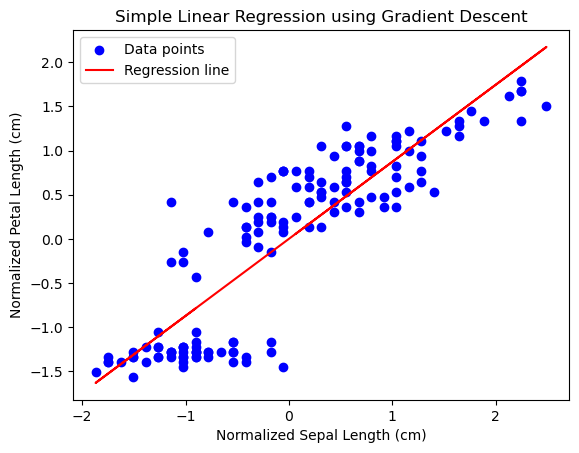

In [2]:
#simple linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "class"]
data = pd.read_csv(url, header=None, names=column_names)

# Choose Sepal Length as x and Petal Length as y
x = data["sepal length (cm)"].values
y = data["petal length (cm)"].values

# Normalize the features (optional but often improves convergence)
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)

# Gradient Descent function
def compute_cost(x, y, m, b):
    n = len(y)
    cost = (1 / (2 * n)) * np.sum((y - (m * x + b)) ** 2)
    return cost

def gradient_descent(x, y, m, b, learning_rate, iterations):
    n = len(y)
    for i in range(iterations):
        y_pred = m * x + b
        dm = (-2 / n) * np.sum(x * (y - y_pred))
        db = (-2 / n) * np.sum(y - y_pred)
        m = m - learning_rate * dm
        b = b - learning_rate * db
    return m, b

# Calculate Mean Absolute Error (MAE)
def calculate_mae(x, y, m, b):
    y_pred = m * x + b
    mae = np.mean(np.abs(y - y_pred))
    return mae

# Parameters
learning_rate = 0.01
iterations = 1000

# Initial guesses
m = 0
b = 0

# Perform Gradient Descent
m, b = gradient_descent(x, y, m, b, learning_rate, iterations)

print(f"Final Slope (m): {m}")
print(f"Final Intercept (b): {b}")

# Calculate and print Mean Absolute Error (MAE)
mae = calculate_mae(x, y, m, b)
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the results
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, m * x + b, color='red', label='Regression line')
plt.xlabel('Normalized Sepal Length (cm)')
plt.ylabel('Normalized Petal Length (cm)')
plt.title('Simple Linear Regression using Gradient Descent')
plt.legend()
plt.show()


Iteration 1: Cost 0.48154337527349683
Iteration 101: Cost 0.02722990539210822
Iteration 201: Cost 0.017574229151539753
Iteration 301: Cost 0.0170162834497616
Iteration 401: Cost 0.016739493315649074
Iteration 501: Cost 0.016535871785391093
Iteration 601: Cost 0.016383348732329963
Iteration 701: Cost 0.016268929664638266
Iteration 801: Cost 0.016183073604440962
Iteration 901: Cost 0.0161186469209896
Final Theta: [ 4.19072329e-16  3.72516336e-01 -1.69788584e-01  5.92863190e-01]
Mean Absolute Error (MAE): 0.13838744250896837


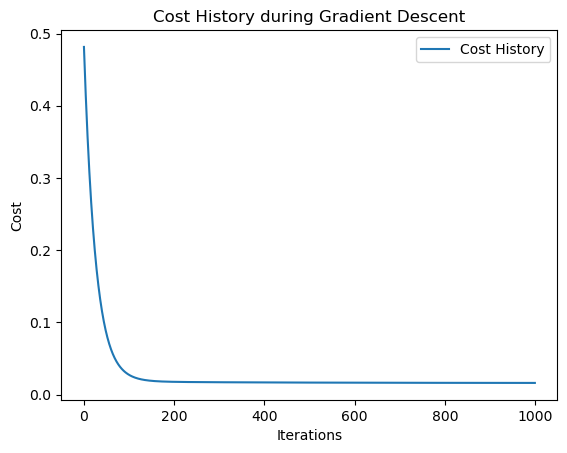

In [3]:
#multiple regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "class"]
data = pd.read_csv(url, header=None, names=column_names)

# Extract the features and target variable
X = data[["sepal length (cm)", "sepal width (cm)", "petal width (cm)"]].values
y = data["petal length (cm)"].values

# Normalize the features and target variable (optional but often improves convergence)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = (y - np.mean(y)) / np.std(y)

# Add a column of ones to X to account for the intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Gradient Descent function for multivariable regression
def compute_cost(X, y, theta):
    n = len(y)
    cost = (1 / (2 * n)) * np.sum((X @ theta - y) ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    n = len(y)
    cost_history = []
    for i in range(iterations):
        gradients = (1 / n) * X.T @ (X @ theta - y)
        theta = theta - learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Iteration {i+1}: Cost {cost}")
    return theta, cost_history

# Calculate Mean Absolute Error (MAE)
def calculate_mae(X, y, theta):
    y_pred = X @ theta
    mae = np.mean(np.abs(y - y_pred))
    return mae

# Parameters for gradient descent
learning_rate = 0.01
iterations = 1000

# Initial guess for theta
theta = np.zeros(X.shape[1])

# Perform Gradient Descent
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

print(f"Final Theta: {theta}")

# Calculate and print Mean Absolute Error (MAE)
mae = calculate_mae(X, y, theta)
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the cost history
plt.plot(range(iterations), cost_history, label='Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History during Gradient Descent')
plt.legend()
plt.show()


Mean Absolute Error (MAE): 0.36903764831980057


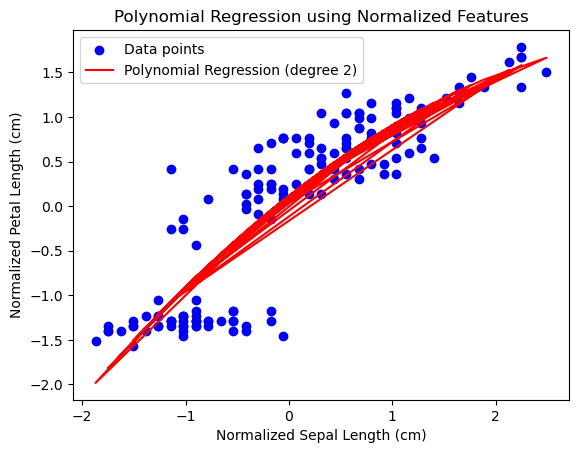

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load the Iris dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "class"]
data = pd.read_csv(url, header=None, names=column_names)

# Choose Sepal Length as x and Petal Length as y
x = data["sepal length (cm)"].values.reshape(-1, 1)
y = data["petal length (cm)"].values

# Normalize the features (optional but often improves convergence)
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)

# Generate polynomial features
degree = 2  # Degree of the polynomial regression
poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(x)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the results
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label=f'Polynomial Regression (degree {degree})')
plt.xlabel('Normalized Sepal Length (cm)')
plt.ylabel('Normalized Petal Length (cm)')
plt.title('Polynomial Regression using Normalized Features')
plt.legend()
plt.show()


Iteration 1: Cost 0.4923001539284199
Iteration 101: Cost 0.17048225513642465
Iteration 201: Cost 0.1230051018156644
Iteration 301: Cost 0.11442574275242173
Iteration 401: Cost 0.11236787640422553
Iteration 501: Cost 0.11172059767891647
Iteration 601: Cost 0.11148189426638991
Iteration 701: Cost 0.11138774823453458
Iteration 801: Cost 0.1113497074857591
Iteration 901: Cost 0.1113342103964785
Final Theta: [ 0.11065906  0.90621482 -0.11232363]
Mean Absolute Error (MAE): 0.36947313490704836


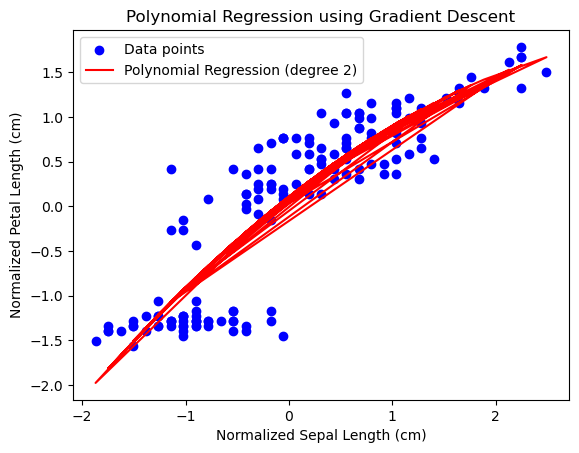

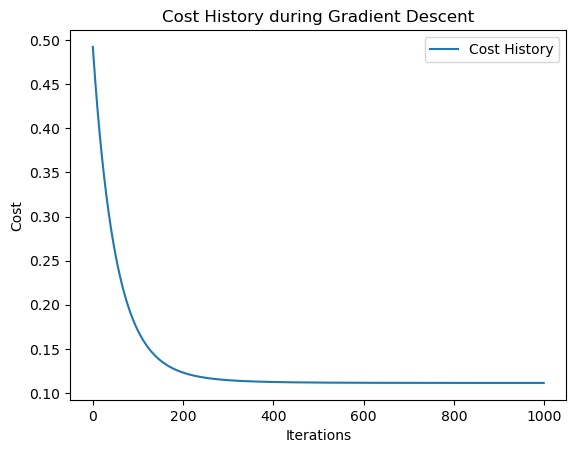

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "class"]
data = pd.read_csv(url, header=None, names=column_names)

# Choose Sepal Length as x and Petal Length as y
x = data["sepal length (cm)"].values
y = data["petal length (cm)"].values

# Normalize the features (optional but often improves convergence)
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)

# Generate polynomial features
degree = 2  # Degree of the polynomial regression
x_poly = np.vstack([x**i for i in range(degree + 1)]).T

# Gradient Descent function for polynomial regression
def compute_cost(x_poly, y, theta):
    n = len(y)
    cost = (1 / (2 * n)) * np.sum((x_poly @ theta - y) ** 2)
    return cost

def gradient_descent(x_poly, y, theta, learning_rate, iterations):
    n = len(y)
    cost_history = []
    for i in range(iterations):
        gradients = (1 / n) * x_poly.T @ (x_poly @ theta - y)
        theta = theta - learning_rate * gradients
        cost = compute_cost(x_poly, y, theta)
        cost_history.append(cost)
        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Iteration {i+1}: Cost {cost}")
    return theta, cost_history

# Calculate Mean Absolute Error (MAE)
def calculate_mae(x_poly, y, theta):
    y_pred = x_poly @ theta
    mae = np.mean(np.abs(y - y_pred))
    return mae

# Parameters for gradient descent
learning_rate = 0.01
iterations = 1000

# Initial guess for theta
theta = np.zeros(x_poly.shape[1])

# Perform Gradient Descent
theta, cost_history = gradient_descent(x_poly, y, theta, learning_rate, iterations)

print(f"Final Theta: {theta}")

# Calculate and print Mean Absolute Error (MAE)
mae = calculate_mae(x_poly, y, theta)
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the results
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, x_poly @ theta, color='red', label=f'Polynomial Regression (degree {degree})')
plt.xlabel('Normalized Sepal Length (cm)')
plt.ylabel('Normalized Petal Length (cm)')
plt.title('Polynomial Regression using Gradient Descent')
plt.legend()
plt.show()

# Plot the cost history
plt.plot(range(iterations), cost_history, label='Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History during Gradient Descent')
plt.legend()
plt.show()


Iteration 1: Cost 0.4849528848465891, m 0.017435083146097423, b 6.6317322004276024e-18
Iteration 101: Cost 0.12644072346730048, m 0.7584547410975175, b 4.732214620162269e-16
Iteration 201: Cost 0.12013523071545969, m 0.8567284390443172, b 6.148563140110747e-16
Iteration 301: Cost 0.12002433004561752, m 0.8697614532221568, b 6.347515106123585e-16
Iteration 401: Cost 0.12002237953055782, m 0.8714898857743918, b 6.394884621840927e-16
Iteration 501: Cost 0.12002234522500307, m 0.8717191097318634, b 6.4185693796996e-16
Iteration 601: Cost 0.12002234462163884, m 0.8717495093113036, b 6.499097556419084e-16
Iteration 701: Cost 0.12002234461102688, m 0.8717535408900283, b 6.508571459562552e-16
Iteration 801: Cost 0.12002234461084026, m 0.8717540755562083, b 6.536993168992959e-16
Iteration 901: Cost 0.12002234461083698, m 0.8717541464633999, b 6.432780234414813e-16
Final Slope (m): 0.8717541558377373
Final Intercept (b): 6.513308411134293e-16
R-squared: 0.7599553107783261


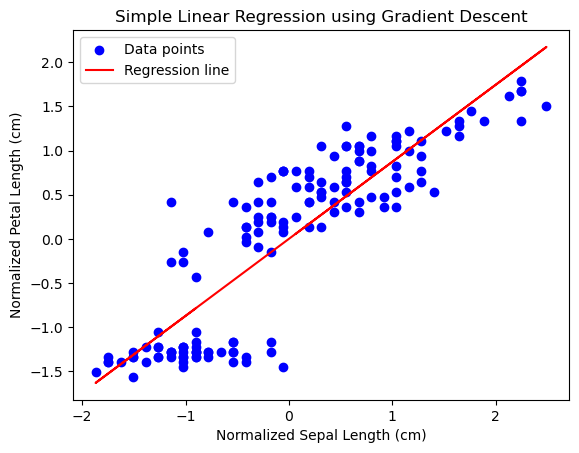

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "class"]
data = pd.read_csv(url, header=None, names=column_names)

# Choose Sepal Length as x and Petal Length as y
x = data["sepal length (cm)"].values
y = data["petal length (cm)"].values

# Normalize the features (optional but often improves convergence)
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)

# Gradient Descent function
def compute_cost(x, y, m, b):
    n = len(y)
    cost = (1 / (2 * n)) * np.sum((y - (m * x + b)) ** 2)
    return cost

def gradient_descent(x, y, m, b, learning_rate, iterations):
    n = len(y)
    for i in range(iterations):
        y_pred = m * x + b
        dm = (-2 / n) * np.sum(x * (y - y_pred))
        db = (-2 / n) * np.sum(y - y_pred)
        m = m - learning_rate * dm
        b = b - learning_rate * db
        cost = compute_cost(x, y, m, b)
        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Iteration {i+1}: Cost {cost}, m {m}, b {b}")
    return m, b

# Calculate R-squared value
def calculate_r_squared(x, y, m, b):
    y_pred = m * x + b
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

# Parameters
learning_rate = 0.01
iterations = 1000

# Initial guesses
m = 0
b = 0

# Perform Gradient Descent
m, b = gradient_descent(x, y, m, b, learning_rate, iterations)

print(f"Final Slope (m): {m}")
print(f"Final Intercept (b): {b}")

# Calculate and print R-squared value
r_squared = calculate_r_squared(x, y, m, b)
print(f"R-squared: {r_squared}")

# Plot the results
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, m * x + b, color='red', label='Regression line')
plt.xlabel('Normalized Sepal Length (cm)')
plt.ylabel('Normalized Petal Length (cm)')
plt.title('Simple Linear Regression using Gradient Descent')
plt.legend()
plt.show()


In [3]:

# Delete Rows by Checking Conditions
#df = pd.DataFrame(read_file1)
#df1 = df.loc[df["Iris-virginica"]]
#print(df1)
read_file2  =read_file1[(read_file1 != 'Iris-virginica').all(axis=1)]
read_file2

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
94,5.7,3.0,4.2,1.2,Iris-versicolor
95,5.7,2.9,4.2,1.3,Iris-versicolor
96,6.2,2.9,4.3,1.3,Iris-versicolor
97,5.1,2.5,3.0,1.1,Iris-versicolor


In [4]:
dataMapping={"Iris-setosa":1,
             "Iris-versicolor":0}
read_file2['class']=read_file2['class'].map(dataMapping)
read_file2

C:\Users\revan\AppData\Local\Temp\ipykernel_10496\1689175362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  read_file2['class']=read_file2['class'].map(dataMapping)


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,4.9,3.0,1.4,0.2,1
1,4.7,3.2,1.3,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,5.4,3.9,1.7,0.4,1
...,...,...,...,...,...
94,5.7,3.0,4.2,1.2,0
95,5.7,2.9,4.2,1.3,0
96,6.2,2.9,4.3,1.3,0
97,5.1,2.5,3.0,1.1,0


In [5]:
len(read_file2.index)

99

In [39]:
# logistic regression

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the dataset
print(df.head())

# Map species names to numeric values
df['species'] = df['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})

# Split the data into features and target
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Detailed classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Accuracy: 0.9666666666666667
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


linear regression

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the dataset
print(df.head())

# Use sepal_length as the predictor (independent variable) and petal_length as the target (dependent variable)
X = df[['sepal_length']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Accuracy Factor
n = len(y_test)
accuracy_factor = 10 ** (np.sum(np.abs(np.log10(y_pred / y_test))) / n)

print(f'Accuracy Factor: {accuracy_factor}')


# Set a threshold for petal length
threshold = 3.0  # You can choose an appropriate threshold based on the dataset

# Convert the continuous predictions to binary classes based on the threshold
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Accuracy Factor: 1.231483128304096
Threshold Accuracy: 0.9333333333333333
Threshold: 3.0


In [2]:
#important
#linear regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the dataset
print(df.head())

# Use sepal_length as the predictor (independent variable) and petal_length as the target (dependent variable)
X = df[['sepal_length']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_continuous_pred = linear_model.predict(X_test_scaled)

# Convert continuous predictions to binary outcomes using median threshold
median_threshold = np.median(y)
y_binary_pred_from_linear = (y_continuous_pred > median_threshold).astype(int)
y_binary_test = (y_test > median_threshold).astype(int)

# Calculate pseudo-accuracy for linear regression
linear_accuracy = accuracy_score(y_binary_test, y_binary_pred_from_linear)

print(f"Linear Regression Pseudo-Accuracy with Normalization: {linear_accuracy}")
print(f"Threshold: {median_threshold}")


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Linear Regression Pseudo-Accuracy with Normalization: 0.8666666666666667
Threshold: 4.35


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the dataset
print(df.head())

# Use sepal_length as the predictor (independent variable) and petal_length as the target (dependent variable)
X = df[['sepal_length']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Set a threshold for petal length
threshold = 2.0  # You can choose an appropriate threshold based on the dataset

# Convert the continuous predictions to binary classes based on the threshold
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Threshold Accuracy: 0.8
Threshold: 2.0


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the dataset
print(df.head())

# Use sepal_length as the predictor (independent variable) and petal_length as the target (dependent variable)
X = df[['sepal_length']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Set a threshold for petal length
threshold = 1.0  # You can choose an appropriate threshold based on the dataset

# Convert the continuous predictions to binary classes based on the threshold
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Threshold Accuracy: 1.0
Threshold: 1.0


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the dataset
print(df.head())

# Use sepal_length as the predictor (independent variable) and petal_length as the target (dependent variable)
X = df[['sepal_length']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Set a threshold for petal length
threshold = 0.5  # You can choose an appropriate threshold based on the dataset

# Convert the continuous predictions to binary classes based on the threshold
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Threshold Accuracy: 1.0
Threshold: 0.5


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the dataset
print(df.head())

# Use sepal_length as the predictor (independent variable) and petal_length as the target (dependent variable)
X = df[['sepal_length']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Set a threshold for petal length
threshold = 0.2  # You can choose an appropriate threshold based on the dataset

# Convert the continuous predictions to binary classes based on the threshold
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Threshold Accuracy: 1.0
Threshold: 0.2


Polynomial Regression Pseudo-Accuracy with Normalization: 0.9333333333333333
Median Threshold: 4.25


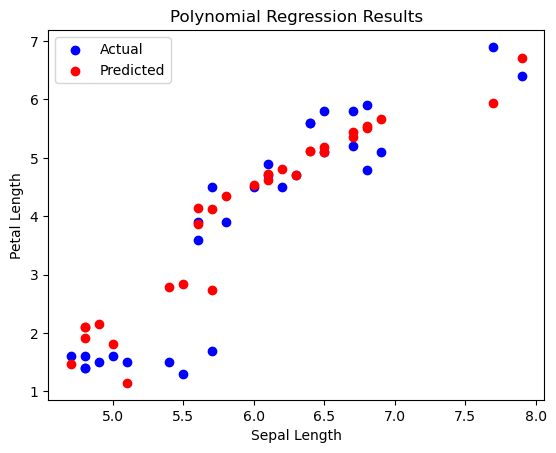

In [4]:
#important
#polynomial

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length and sepal_width as predictors and petal_length as the target
X = df[['sepal_length', 'sepal_width']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_continuous_pred = poly_model.predict(X_test_poly)

# Convert continuous predictions to binary outcomes using median threshold
median_threshold = np.median(y_train)
y_binary_pred_from_poly = (y_continuous_pred > median_threshold).astype(int)
y_binary_test = (y_test > median_threshold).astype(int)

# Calculate pseudo-accuracy for polynomial regression
poly_accuracy = accuracy_score(y_binary_test, y_binary_pred_from_poly)

print(f"Polynomial Regression Pseudo-Accuracy with Normalization: {poly_accuracy}")
print(f"Median Threshold: {median_threshold}")

# Optional: Plot the polynomial regression results
plt.scatter(X_test['sepal_length'], y_test, color='blue', label='Actual')
plt.scatter(X_test['sepal_length'], y_continuous_pred, color='red', label='Predicted')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Polynomial Regression Results')
plt.legend()
plt.show()


In [1]:
#polynomial regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length and sepal_width as predictors and petal_length as the target
X = df[['sepal_length']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the testing set
y_test_pred = poly_model.predict(X_test_poly)

# Set a threshold for classification (example threshold)
threshold = 2.0

# Convert predictions to binary classes based on the threshold
y_test_pred_class = (y_test_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy of classification
accuracy = accuracy_score(y_test_class, y_test_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')



Threshold Accuracy: 0.8333333333333334
Threshold: 2.0


In [2]:
#polynomial regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length and sepal_width as predictors and petal_length as the target
X = df[['sepal_length']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the testing set
y_test_pred = poly_model.predict(X_test_poly)

# Set a threshold for classification (example threshold)
threshold = 1.0

# Convert predictions to binary classes based on the threshold
y_test_pred_class = (y_test_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy of classification
accuracy = accuracy_score(y_test_class, y_test_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')



Threshold Accuracy: 1.0
Threshold: 1.0


In [4]:
#polynomial regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length and sepal_width as predictors and petal_length as the target
X = df[['sepal_length']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the testing set
y_test_pred = poly_model.predict(X_test_poly)

# Set a threshold for classification (example threshold)
threshold = 0.4

# Convert predictions to binary classes based on the threshold
y_test_pred_class = (y_test_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy of classification
accuracy = accuracy_score(y_test_class, y_test_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')



Threshold Accuracy: 1.0
Threshold: 0.4


In [5]:
#polynomial regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length and sepal_width as predictors and petal_length as the target
X = df[['sepal_length']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the testing set
y_test_pred = poly_model.predict(X_test_poly)

# Set a threshold for classification (example threshold)
threshold = 0.3

# Convert predictions to binary classes based on the threshold
y_test_pred_class = (y_test_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy of classification
accuracy = accuracy_score(y_test_class, y_test_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')



Threshold Accuracy: 1.0
Threshold: 0.3


In [6]:
#polynomial regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length and sepal_width as predictors and petal_length as the target
X = df[['sepal_length']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the testing set
y_test_pred = poly_model.predict(X_test_poly)

# Set a threshold for classification (example threshold)
threshold = 4.0

# Convert predictions to binary classes based on the threshold
y_test_pred_class = (y_test_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy of classification
accuracy = accuracy_score(y_test_class, y_test_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')



Threshold Accuracy: 0.9666666666666667
Threshold: 4.0


In [7]:
#polynomial regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length and sepal_width as predictors and petal_length as the target
X = df[['sepal_length']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the testing set
y_test_pred = poly_model.predict(X_test_poly)

# Set a threshold for classification (example threshold)
threshold = 5.0

# Convert predictions to binary classes based on the threshold
y_test_pred_class = (y_test_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy of classification
accuracy = accuracy_score(y_test_class, y_test_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')



Threshold Accuracy: 0.9
Threshold: 5.0


In [3]:
#important
#multivariable

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length, sepal_width, and petal_width as predictors and petal_length as the target
X = df[['sepal_length', 'sepal_width', 'petal_width']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_continuous_pred = linear_model.predict(X_test_scaled)

# Convert continuous predictions to binary outcomes using median threshold
median_threshold = np.median(y_train)
y_binary_pred_from_linear = (y_continuous_pred > median_threshold).astype(int)
y_binary_test = (y_test > median_threshold).astype(int)

# Calculate pseudo-accuracy for linear regression
linear_accuracy = accuracy_score(y_binary_test, y_binary_pred_from_linear)

print(f"Linear Regression Pseudo-Accuracy with Normalization: {linear_accuracy}")
print(f"Median Threshold: {median_threshold}")


Linear Regression Pseudo-Accuracy with Normalization: 0.9333333333333333
Median Threshold: 4.25


In [46]:
#important

#multivariable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length, sepal_width, and petal_width as predictors and petal_length as the target
X = df[['sepal_length', 'sepal_width', 'petal_width']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Set a threshold for petal length classification
threshold = 4.0  # Example threshold, you can adjust this based on your requirements

# Convert predictions to binary classes based on the threshold
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')


Threshold Accuracy: 0.9666666666666667
Threshold: 4.0


In [13]:
#multivariable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length, sepal_width, and petal_width as predictors and petal_length as the target
X = df[['sepal_length', 'sepal_width', 'petal_width']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Set a threshold for petal length classification
threshold = 3.0  # Example threshold, you can adjust this based on your requirements

# Convert predictions to binary classes based on the threshold
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')


Threshold Accuracy: 1.0
Threshold: 3.0


In [14]:
#multivariable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length, sepal_width, and petal_width as predictors and petal_length as the target
X = df[['sepal_length', 'sepal_width', 'petal_width']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Set a threshold for petal length classification
threshold = 2.0  # Example threshold, you can adjust this based on your requirements

# Convert predictions to binary classes based on the threshold
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')


Threshold Accuracy: 0.9666666666666667
Threshold: 2.0


In [15]:
#multivariable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length, sepal_width, and petal_width as predictors and petal_length as the target
X = df[['sepal_length', 'sepal_width', 'petal_width']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Set a threshold for petal length classification
threshold = 1.0  # Example threshold, you can adjust this based on your requirements

# Convert predictions to binary classes based on the threshold
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')


Threshold Accuracy: 1.0
Threshold: 1.0


In [16]:
#multivariable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length, sepal_width, and petal_width as predictors and petal_length as the target
X = df[['sepal_length', 'sepal_width', 'petal_width']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Set a threshold for petal length classification
threshold = 5.0  # Example threshold, you can adjust this based on your requirements

# Convert predictions to binary classes based on the threshold
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')


Threshold Accuracy: 0.9666666666666667
Threshold: 5.0


In [17]:
#multivariable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length, sepal_width, and petal_width as predictors and petal_length as the target
X = df[['sepal_length', 'sepal_width', 'petal_width']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Set a threshold for petal length classification
threshold = 6.0  # Example threshold, you can adjust this based on your requirements

# Convert predictions to binary classes based on the threshold
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')


Threshold Accuracy: 0.9
Threshold: 6.0


In [18]:
#multivariable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Use sepal_length, sepal_width, and petal_width as predictors and petal_length as the target
X = df[['sepal_length', 'sepal_width', 'petal_width']]
y = df['petal_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Set a threshold for petal length classification
threshold = 7.0  # Example threshold, you can adjust this based on your requirements

# Convert predictions to binary classes based on the threshold
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Threshold Accuracy: {accuracy}')

# Print the threshold used for classification
print(f'Threshold: {threshold}')


Threshold Accuracy: 0.9666666666666667
Threshold: 7.0


In [24]:
x1 = read_file2.iloc[:,[0]].values
y1= read_file2.iloc[:,1].values


In [25]:
from sklearn.model_selection import train_test_split
  
x1train, x1test, y1train, y1test = train_test_split(
    x1, y1, test_size=0.25, random_state=0)


In [26]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
x1train = sc_x.fit_transform(x1train)
x1test = sc_x.transform(x1test)


In [27]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [28]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(x1train, y1train)

LinearRegression()

In [42]:
# Make predictions on the test set
y1pred = model.predict(x1test)

# Evaluate the model's performance
mse = mean_squared_error(y1test, y1pred)
r2 = r2_score(y1test, y1pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Define a threshold for accuracy
threshold = 0.5

# Calculate value-based accuracy for train set
value_accuracy_train = np.mean(np.abs(y_train - y_pred) <= threshold)
print(f'Value-based Accuracy on Train Set with threshold {threshold}: {value_accuracy_train * 100:.2f}%')



C:\Users\revan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LogisticRegression is expecting 4 features as input.

logistic regression

In [30]:
x2 = read_file2.iloc[:,[0,1,2]].values
y2 = read_file2.iloc[:,4].values
y2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
from sklearn.model_selection import train_test_split
  
x2train, x2test, y2train, y2test = train_test_split(x2, y2, test_size=0.25, random_state=0)
x2train

array([[5. , 3.3, 1.4],
       [5. , 3.4, 1.5],
       [5.7, 2.8, 4.1],
       [6. , 2.7, 5.1],
       [6.7, 3. , 5. ],
       [5.9, 3. , 4.2],
       [5.5, 2.4, 3.7],
       [5.5, 2.6, 4.4],
       [5.6, 2.5, 3.9],
       [6.9, 3.1, 4.9],
       [5.2, 3.4, 1.4],
       [5.1, 3.8, 1.5],
       [4.9, 2.4, 3.3],
       [5.6, 2.9, 3.6],
       [6.6, 3. , 4.4],
       [4.7, 3.2, 1.3],
       [6. , 2.2, 4. ],
       [5. , 3.5, 1.6],
       [4.4, 3.2, 1.3],
       [5.4, 3.9, 1.7],
       [5.4, 3.9, 1.3],
       [5.7, 3.8, 1.7],
       [4.5, 2.3, 1.3],
       [5.1, 3.4, 1.5],
       [4.6, 3.4, 1.4],
       [6.1, 3. , 4.6],
       [5. , 2. , 3.5],
       [4.9, 3. , 1.4],
       [5. , 3.2, 1.2],
       [4.7, 3.2, 1.6],
       [6.4, 3.2, 4.5],
       [4.8, 3. , 1.4],
       [5.5, 3.5, 1.3],
       [4.8, 3.4, 1.9],
       [5.5, 2.3, 4. ],
       [4.8, 3.4, 1.6],
       [5.2, 4.1, 1.5],
       [5.8, 2.7, 4.1],
       [6.6, 2.9, 4.6],
       [5.5, 2.4, 3.8],
       [6.7, 3.1, 4.7],
       [5.5, 4.2

In [32]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
x2train = sc_x.fit_transform(x2train)
x2test = sc_x.transform(x2test)
print (x2train)


[[-0.71449353  0.42607966 -1.02944431]
 [-0.71449353  0.63351318 -0.95993803]
 [ 0.38049952 -0.61108793  0.84722515]
 [ 0.84978225 -0.81852145  1.54228792]
 [ 1.9447753  -0.1962209   1.47278164]
 [ 0.69335467 -0.1962209   0.91673143]
 [ 0.06764436 -1.44082201  0.56920005]
 [ 0.06764436 -1.02595497  1.05574398]
 [ 0.22407194 -1.23338849  0.7082126 ]
 [ 2.25763046  0.01121262  1.40327536]
 [-0.40163838  0.63351318 -1.02944431]
 [-0.55806596  1.46324726 -0.95993803]
 [-0.87092111 -1.44082201  0.29117494]
 [ 0.22407194 -0.40365442  0.49969377]
 [ 1.78834772 -0.1962209   1.05574398]
 [-1.18377627  0.21864614 -1.09895059]
 [ 0.84978225 -1.85568905  0.77771888]
 [-0.71449353  0.8409467  -0.89043176]
 [-1.653059    0.21864614 -1.09895059]
 [-0.08878322  1.67068077 -0.82092548]
 [-0.08878322  1.67068077 -1.09895059]
 [ 0.38049952  1.46324726 -0.82092548]
 [-1.49663143 -1.64825553 -1.09895059]
 [-0.55806596  0.63351318 -0.95993803]
 [-1.34020385  0.63351318 -1.02944431]
 [ 1.00620983 -0.1962209 

In [33]:
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(x2train, y2train)

y2_pred = classifier.predict(x2test)

from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y2test, y2_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y2test, y2_pred)
print ("Confusion Matrix : \n", cm)
print ("Accuracy : ", accuracy_score(y2test, y2_pred))



Confusion Matrix : 
 [[12  0]
 [ 0 13]]
Accuracy :  1.0


polynomial regression

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming read_file2 contains your dataset and is loaded correctly
# Example:
# x3 = read_file2.iloc[:, 0].values.reshape(-1, 1)  # sepal length as predictor
# y3 = read_file2.iloc[:, 1].values  # sepal width as target

# Load the Iris dataset
iris = load_iris()
x3 = iris.data[:, 0].reshape(-1, 1)  # Using sepal length as the predictor (1st feature)
y3 = iris.data[:, 1]  # Using sepal width as the target (2nd feature)

# Split data into training and testing sets
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Polynomial features transformation
poly = PolynomialFeatures(degree=2)  # Use degree 2 polynomial features
x3_poly_train = poly.fit_transform(x3_train)
x3_poly_test = poly.transform(x3_test)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(x3_poly_train, y3_train)

# Predictions
y3_pred_train = model.predict(x3_poly_train)
y3_pred_test = model.predict(x3_poly_test)

# Evaluate the model
# Calculate MSE for training and testing sets
train_mse = mean_squared_error(y3_train, y3_pred_train)
test_mse = mean_squared_error(y3_test, y3_pred_test)

# Print MSE values
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

# Define a percentage-based threshold for accuracy
percentage_threshold = 0.20  # e.g., within 10% of the actual value

# Calculate percentage-based accuracy for testing set
percentage_accuracy_test = np.mean(np.abs(y3_test - y3_pred_test) / y3_test <= percentage_threshold)
print(f'Percentage-based Accuracy (Test set) with threshold {percentage_threshold * 100}%: {percentage_accuracy_test * 100:.2f}%')


Train MSE: 0.19
Test MSE: 0.13
Percentage-based Accuracy (Test set) with threshold 20.0%: 83.33%


In [144]:
import pandas as pd
read_file1= pd.read_csv (r'C:\\Users\\revan\\Documents\\car_data\iris.data')
read_file1.to_csv (r'C:\\Users\\revan\\Documents\\car_data\iris.data',index=None)
#read_file1.columns = [str(x) for x in range(1,16)]
read_file1.rename(columns={'5.1':'sepal length in cm','3.5':'sepal width in cm',
                     '1.4':'petal length in cm', '0.2' :'petal width in cm', 'Iris-setosa':'class'},inplace = True)

read_file1


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [145]:
read_file2  =read_file1[(read_file1 != 'Iris-virginica').all(axis=1)]
read_file2

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
94,5.7,3.0,4.2,1.2,Iris-versicolor
95,5.7,2.9,4.2,1.3,Iris-versicolor
96,6.2,2.9,4.3,1.3,Iris-versicolor
97,5.1,2.5,3.0,1.1,Iris-versicolor


In [146]:
dataMapping={"Iris-setosa":1,
             "Iris-versicolor":0}
read_file2['class']=read_file2['class'].map(dataMapping)
read_file2

C:\Users\revan\AppData\Local\Temp\ipykernel_12444\1689175362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  read_file2['class']=read_file2['class'].map(dataMapping)


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,4.9,3.0,1.4,0.2,1
1,4.7,3.2,1.3,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,5.4,3.9,1.7,0.4,1
...,...,...,...,...,...
94,5.7,3.0,4.2,1.2,0
95,5.7,2.9,4.2,1.3,0
96,6.2,2.9,4.3,1.3,0
97,5.1,2.5,3.0,1.1,0


In [147]:
read_file2  =read_file2[(read_file1 != 'Iris-virginica').all(axis=1)]
read_file2

C:\Users\revan\AppData\Local\Temp\ipykernel_12444\3972715814.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  read_file2  =read_file2[(read_file1 != 'Iris-virginica').all(axis=1)]


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,4.9,3.0,1.4,0.2,1
1,4.7,3.2,1.3,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,5.4,3.9,1.7,0.4,1
...,...,...,...,...,...
94,5.7,3.0,4.2,1.2,0
95,5.7,2.9,4.2,1.3,0
96,6.2,2.9,4.3,1.3,0
97,5.1,2.5,3.0,1.1,0


In [151]:
x = read_file2.iloc[:,0].values
y = read_file2.iloc[:,4].values
x

array([4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8, 4.3,
       5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. , 5. ,
       5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4, 5.1,
       5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4, 6.9,
       5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6, 6.7,
       5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6. ,
       5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5, 6.1,
       5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

In [21]:
#MULTIVARIABLE REGRESSION
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate some sample data
X11 = read_file2.iloc[:,[0,2,3]].values
y11= read_file2.iloc[:,1].values


# Split the data into training and testing sets
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.2, random_state=0)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X11_train, y11_train)

# Make predictions on the test data
y11_pred = model.predict(X11_test)

# Calculate Mean Squared Error (MSE) as a measure of accuracy
mse = mean_squared_error(y11_test, y11_pred)
print(f"Mean Squared Error: {mse}")
# Define a tolerance level for rounding predictions
tolerance = 0.5  # Adjust as needed

# Round predictions to the nearest integer
y_pred_rounded = np.round(y11_pred)

# Calculate the percentage of predictions within the tolerance
accuracy_like_metric = np.mean(np.abs(y11_test - y_pred_rounded) <= tolerance) 

print(f"Accuracy-like Metric: {accuracy_like_metric:.2f}")



Mean Squared Error: 0.0820579679359735
Accuracy-like Metric: 0.80


In [38]:
#polynomial regression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some sample data
np.random.seed(0)
x = read_file2.iloc[:,2].values
y = read_file2.iloc[:,1].values
X = x.reshape(-1, 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Polynomial feature transformation
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Define a tolerance level for rounding predictions
tolerance = 0.5  # Adjust as needed

# Round predictions to the nearest integer
y_pred_rounded = np.round(y_pred)

# Calculate the percentage of predictions within the tolerance
accuracy_like_metric = np.mean(np.abs(y_test - y_pred_rounded) <= tolerance) 

print(f"Accuracy-like Metric: {accuracy_like_metric:.2f}")


Accuracy-like Metric: 0.90


In [35]:
#linear regression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate some sample data
np.random.seed(0)
X =read_file2.iloc[:,0].values
y = read_file2.iloc[:,1].values

X = X.reshape(-1, 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make continuous predictions on the test data
y_pred_continuous = model.predict(X_test)

# Define a tolerance level for rounding predictions
tolerance = 0.5  # Adjust as needed

# Round predictions to the nearest integer
y_pred_rounded = np.round(y_pred_continuous)

# Calculate the percentage of predictions within the tolerance
accuracy_like_metric = np.mean(np.abs(y_test - y_pred_rounded) <= tolerance) 

print(f"Accuracy-like Metric: {accuracy_like_metric:.2f}")


Accuracy-like Metric: 0.85
